In [6]:
# Import the pandas library
import pandas as pd

# -------------------------------
# Step 1: Load the dataset
# -------------------------------
# Replace 'COVID-19.csv' with your actual file path if needed
df = pd.read_csv('/kaggle/input/covid-19/covid.csv')

# Optional: Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# -------------------------------
# Step 2: Create new ratio columns
# -------------------------------

# Calculate Active Ratio (%)
df['Active Ratio'] = (df['Active'] / df['Total Cases']) * 100

# Calculate Discharge Ratio (%)
df['Discharge Ratio'] = (df['Discharged'] / df['Total Cases']) * 100

# Calculate Death Ratio (%)
df['Death Ratio'] = (df['Deaths'] / df['Total Cases']) * 100

# Calculate Cases per Million
df['Cases per Million'] = df['Total Cases'] / df['Population (millions)']

# -------------------------------
# Step 3: Display the result
# -------------------------------
print(df.head())  # View first 5 rows to verify

     State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Maharashtra      1250000   15000     1220000   25000   
1       Kerala       950000   10000      935000    5000   
2   Tamil Nadu       850000    8000      838000    4000   
3        Delhi       700000    5000      692000    3000   
4    Karnataka       600000    7000      588000    5000   

   Population (millions)  Active Ratio  Discharge Ratio  Death Ratio  \
0                    123      1.200000        97.600000     2.000000   
1                     35      1.052632        98.421053     0.526316   
2                     76      0.941176        98.588235     0.470588   
3                     20      0.714286        98.857143     0.428571   
4                     68      1.166667        98.000000     0.833333   

   Cases per Million  
0       10162.601626  
1       27142.857143  
2       11184.210526  
3       35000.000000  
4        8823.529412  


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


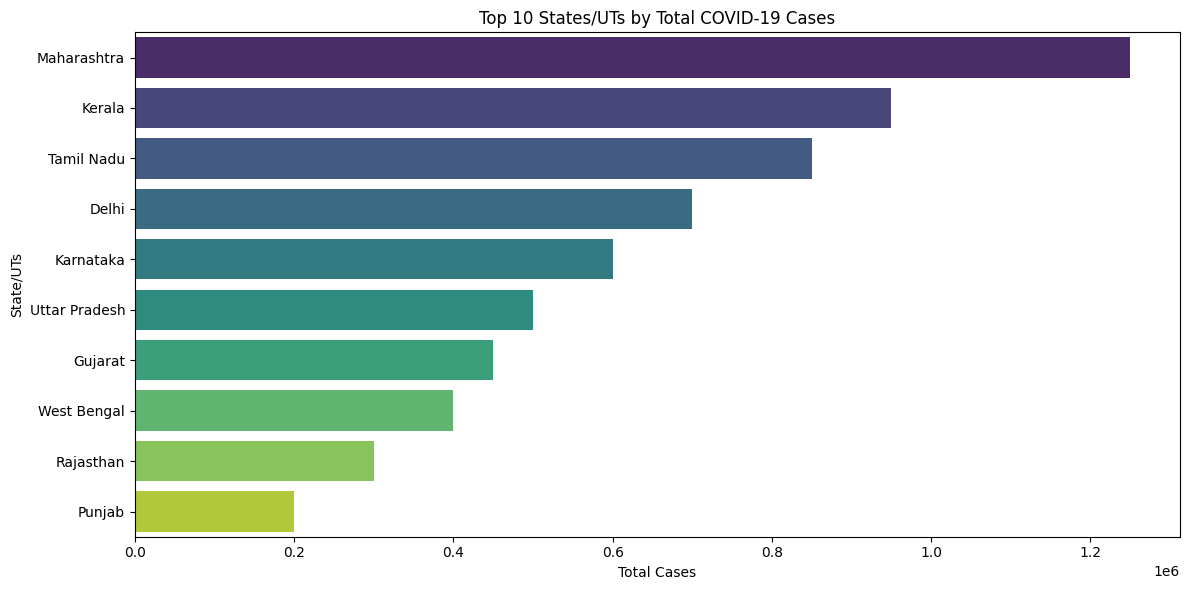

In [8]:
top10_states = df.sort_values('Total Cases', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Total Cases', y='State/UTs', data=top10_states, palette='viridis')
plt.title('Top 10 States/UTs by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('State/UTs')
plt.tight_layout()
plt.show()


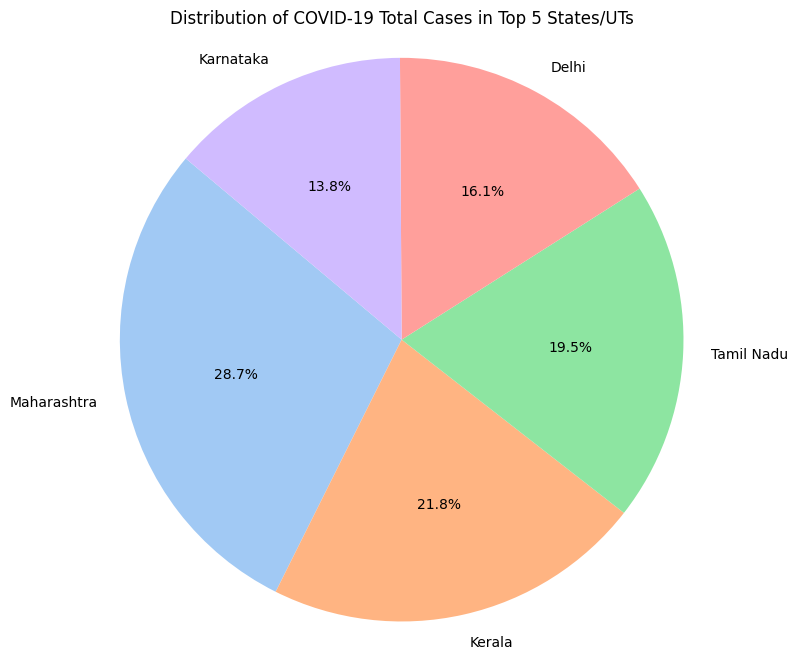

In [9]:
top5 = df.sort_values('Total Cases', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top5['Total Cases'], labels=top5['State/UTs'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of COVID-19 Total Cases in Top 5 States/UTs')
plt.axis('equal')  # Keeps pie chart circular
plt.show()


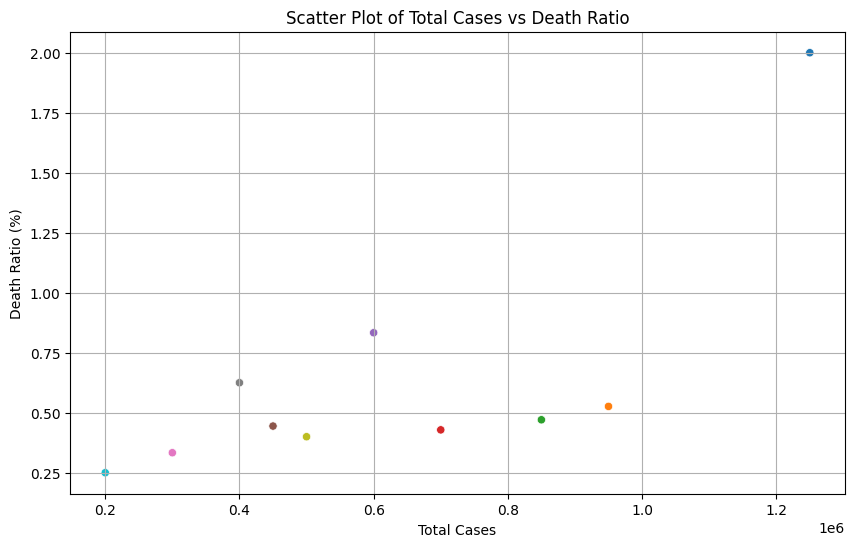

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Cases', y='Death Ratio', data=df, hue='State/UTs', palette='tab10', legend=False)
plt.title('Scatter Plot of Total Cases vs Death Ratio')
plt.xlabel('Total Cases')
plt.ylabel('Death Ratio (%)')
plt.grid(True)
plt.show()


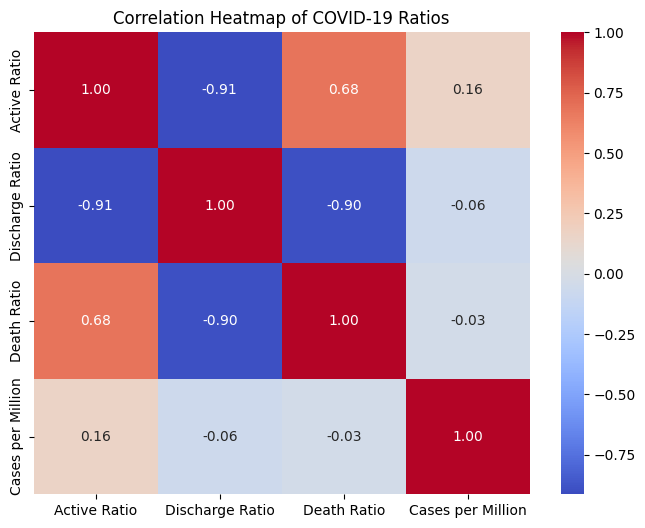

In [11]:
plt.figure(figsize=(8,6))
corr = df[['Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Cases per Million']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of COVID-19 Ratios')
plt.show()


🔍 Correlation Matrix:
                       Total Cases    Active  Discharged    Deaths  \
Total Cases               1.000000  0.971481    0.999959  0.804844   
Active                    0.971481  1.000000    0.969609  0.868355   
Discharged                0.999959  0.969609    1.000000  0.799856   
Deaths                    0.804844  0.868355    0.799856  1.000000   
Population (millions)     0.085023  0.106991    0.083139  0.225845   
Active Ratio              0.762933  0.870975    0.759766  0.688254   
Discharge Ratio          -0.790990 -0.889751   -0.786308 -0.860381   
Death Ratio               0.738359  0.817579    0.732626  0.978452   
Cases per Million         0.448184  0.319298    0.453196  0.052301   

                       Population (millions)  Active Ratio  Discharge Ratio  \
Total Cases                         0.085023      0.762933        -0.790990   
Active                              0.106991      0.870975        -0.889751   
Discharged                          0.08

/tmp/ipykernel_36/2822866490.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


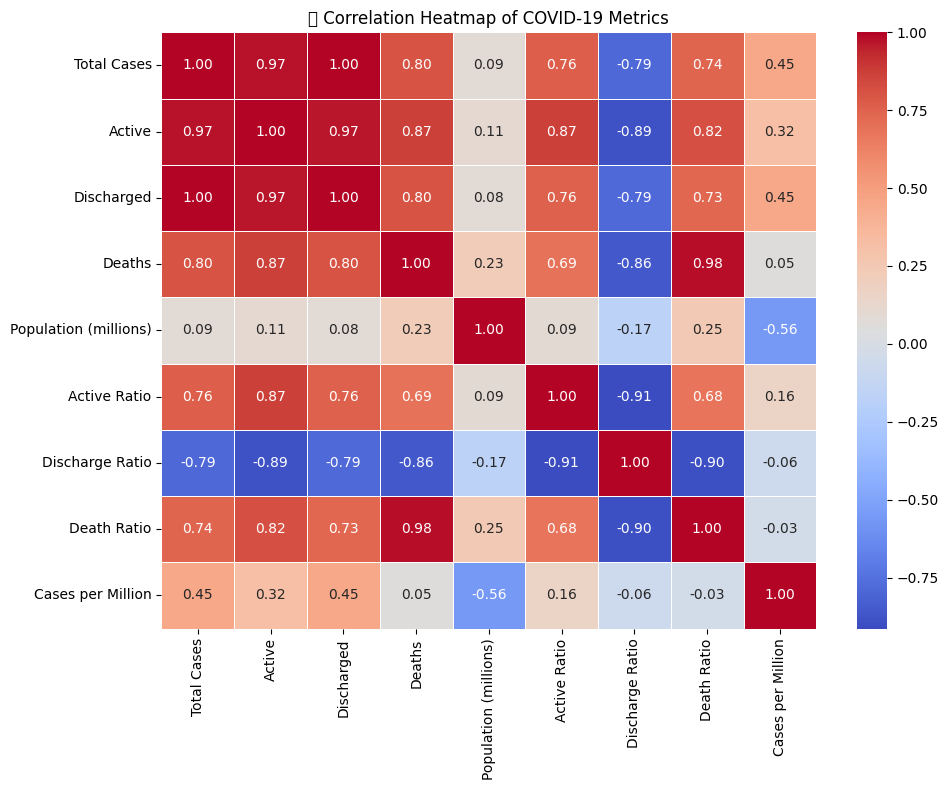

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/covid-19/covid.csv')

# Clean column names
df.columns = df.columns.str.replace('\xa0', ' ')
df.rename(columns={'Population (millions)': 'Population (millions)'}, inplace=True)

# Create derived ratio columns (if not already created)
df['Active Ratio'] = (df['Active'] / df['Total Cases']) * 100
df['Discharge Ratio'] = (df['Discharged'] / df['Total Cases']) * 100
df['Death Ratio'] = (df['Deaths'] / df['Total Cases']) * 100
df['Cases per Million'] = df['Total Cases'] / df['Population (millions)']

# Select numeric columns for correlation
numeric_cols = [
    'Total Cases', 'Active', 'Discharged', 'Deaths',
    'Population (millions)', 'Active Ratio', 
    'Discharge Ratio', 'Death Ratio', 'Cases per Million'
]

corr_df = df[numeric_cols]

# Compute correlation matrix
correlation_matrix = corr_df.corr(method='pearson')

# Print correlation matrix
print("🔍 Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('📊 Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()


In [16]:
q1 = df.loc[df['Active Ratio'].idxmax(), ['State/UTs', 'Active Ratio']]
print("Q1. State with highest Active Ratio:\n", q1, "\n")

# Q2. Top 3 states with highest cases per million
q2 = df[['State/UTs', 'Cases per Million']].sort_values(by='Cases per Million', ascending=False).head(3)
print("Q2. Top 3 states with highest cases per million:\n", q2, "\n")

# Q3. States with death ratio > 1.5%
q3 = df[df['Death Ratio'] > 1.5][['State/UTs', 'Death Ratio']]
print("Q3. States with Death Ratio > 1.5%:\n", q3, "\n")

# Q4. States with total cases > 500,000 and < 1,000,000
q4 = df[(df['Total Cases'] > 500000) & (df['Total Cases'] < 1000000)][['State/UTs', 'Total Cases']]
print("Q4. States with Total Cases between 500,000 and 1,000,000:\n", q4, "\n")

# Q5. What’s the average discharge ratio?
q5 = df['Discharge Ratio'].mean()
print(f"Q5. Average Discharge Ratio: {q5:.2f}%")

Q1. State with highest Active Ratio:
 State/UTs       Maharashtra
Active Ratio            1.2
Name: 0, dtype: object 

Q2. Top 3 states with highest cases per million:
     State/UTs  Cases per Million
3       Delhi       35000.000000
1      Kerala       27142.857143
2  Tamil Nadu       11184.210526 

Q3. States with Death Ratio > 1.5%:
      State/UTs  Death Ratio
0  Maharashtra          2.0 

Q4. States with Total Cases between 500,000 and 1,000,000:
     State/UTs  Total Cases
1      Kerala       950000
2  Tamil Nadu       850000
3       Delhi       700000
4   Karnataka       600000 

Q5. Average Discharge Ratio: 98.59%
